<hr>

<h1>Contenido</h1>

- [Transformaciones lineales](#Transformaciones-lineales)
- [Determinante](#Determinante)

In [4]:
!pip install jupyterthemes

     ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
     ---------------------------------------- 0.1/7.0 MB 231.8 kB/s eta 0:00:30
     ---------------------------------------- 0.1/7.0 MB 231.8 kB/s eta 0:00:30
     ---------------------------------------- 0.1/7.0 MB 231.8 kB/s eta 0:00:30
     ---------------------------------------- 0.1/7.0 MB 231.8 kB/s eta 0:00:30
     ---------------------------------------- 0.1/7.0 MB 231.8 kB/s eta 0:00:30
     ---------------------------------------- 0.1/7.0 MB 231.8 kB/s eta 0:00:30
     ---------------------------------------- 0.1/7.0 MB 231.8 kB/s eta 0:00:30
      --------

In [5]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

#especial
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

<hr>
<h2>Transformaciones lineales</h2>

Una transformación lineal es un tipo de función particular, que se define entre dos espacios vectoriales y cumple las siguientes propiedades:

$$$$

- $T(\vec{x} + \vec{y}) = T(\vec{x}) + T(\vec{y})$
- $T(\alpha \vec{x}) = \alpha T(\vec{x})$

$$$$

Podemos entender que una transformación lineal es una función cuyo trabajo es movernos entre espacios vectoriales, o también podemos imaginar que deforman el espacio. Tomemos un ejemplo.
$$$$

$$T(x_1, x_2, x_3) = (x_1 + x_3, x_2 - 2x_3)$$
$$$$

Esta transformación nos va a llevar de $\mathbb{R}^3$ a $\mathbb{R}^2$. Las transformaciones lineales las podremos identificar también en una forma matricial:

$$$$

$$
\begin{bmatrix}
1 & 0 & 1\\
0 & 1 & -2\\
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2\\
x_3\\
\end{bmatrix}
=
\begin{bmatrix}
x_1 + x_3\\
x_2 - 2x_3\\
\end{bmatrix}
$$





Para visualizar transformaciones lineales en Python, puedes utilizar bibliotecas como Matplotlib y NumPy. Aquí tienes un ejemplo simple con una transformación 2D:

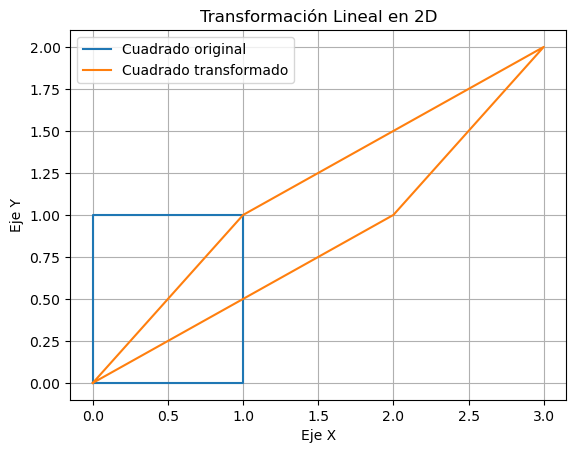

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Definir una matriz de transformación lineal
matrix_transform = np.array([[2, 1], [1, 1]])
# Generar puntos en un cuadrado
cuadrado = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])
# Aplicar la transformación lineal a cada punto del cuadrado
transformed_cuadrado = np.dot(cuadrado, matrix_transform)
# Graficar el cuadrado original y el transformado
plt.plot(cuadrado[:, 0], cuadrado[:, 1], label='Cuadrado original')
plt.plot(transformed_cuadrado[:, 0], transformed_cuadrado[:, 1], label='Cuadrado transformado')
plt.legend()
plt.title('Transformación Lineal en 2D')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.grid(True)
plt.show()

Este código define una matriz de transformación lineal, aplica esa transformación a un cuadrado en 2D y luego grafica tanto el cuadrado original como el transformado. Puedes experimentar con diferentes matrices de transformación para observar cómo afectan los patrones geométricos en la visualización.

In [7]:
v = Matrix(symbols("x_1,X_2,X_3"))

In [8]:
v

Matrix([
[x_1],
[X_2],
[X_3]])

In [9]:
T = Matrix([[1, 0, 1], [0,1,-1]])

In [10]:
T

Matrix([
[1, 0,  1],
[0, 1, -1]])

In [11]:
T * v

Matrix([
[X_3 + x_1],
[X_2 - X_3]])

Podemos imaginar que una transformación lineal deforma el espacio, conservando las rectas como rectas y también deja el origen fijo. Esto da la impresión de que la transformación _tuerce_ el espacio dándole una nueva forma.

$$$$

Para hacernos una idea clara de que hace una transformación lineal a los elementos que modifica, basta con fijarnos que hace a los vectores canonicos ($\hat{i}$ y $\hat{j}$), veamos por ejemplo la transformación lineal representada por la matriz:

$$$$

$$
\begin{bmatrix}
3 & 2\\
-2 & 1\\
\end{bmatrix}
$$


$$
\begin{bmatrix}
3 & 2\\
-2 & 1\\
\end{bmatrix}
\begin{bmatrix}
1\\
0\\
\end{bmatrix}
=
\begin{bmatrix}
3\\
-2\\
\end{bmatrix}
$$

$$
\begin{bmatrix}
3 & 2\\
-2 & 1\\
\end{bmatrix}
\begin{bmatrix}
0\\
1\\
\end{bmatrix}
=
\begin{bmatrix}
2\\
1\\
\end{bmatrix}
$$

$$$$

Vemos que _envía_ a $\hat{i}$ al punto (3, -2) y a $\hat{j}$ al punto (2, 1) es decir podemos entender las columnas de esta matriz como la transformación aplicada a $\hat{i}$ y $\hat{j}$, y de esta forma podemos aplicar la transformación a un vector multiplicando el vector columna y la matriz de la transformación:

$$$$

$$
\begin{bmatrix}
3 & 2\\
-2 & 1
\end{bmatrix}
\begin{bmatrix}
5\\
7
\end{bmatrix}
=
\begin{bmatrix}
29\\
-3
\end{bmatrix}
$$

In [12]:
i = np.array([1,0])
j = np.array([0,1])

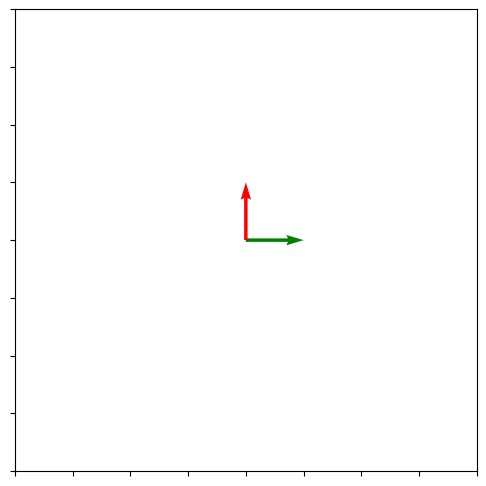

In [15]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.quiver([0], [0], [i[0]], [i[1]], color='g', scale=8)
ax.quiver([0], [0], [j[0]], [j[1]], color='r', scale=8)
ax.set_aspect('equal')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

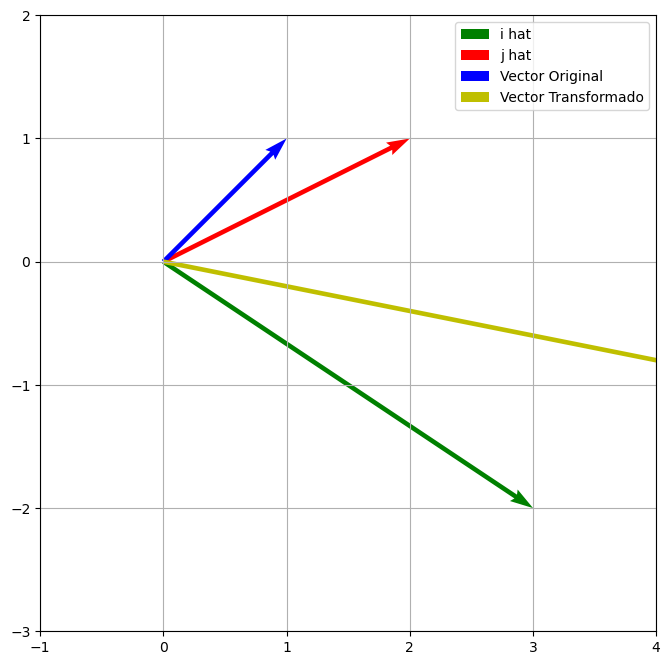

In [18]:
# Definir los vectores i y j según la descripción
i = np.array([3, -2])
j = np.array([2, 1])
# Definir la matriz de transformación
matrix_transform = np.column_stack((i, j))
# Definir un vector de prueba (por ejemplo, [1, 1])
vector_prueba = np.array([1, 1])
# Aplicar la transformación multiplicando la matriz por el vector
vector_transformado = np.dot(matrix_transform, vector_prueba)
# Crear la gráfica
fig, ax = plt.subplots(figsize=(8, 8))
# Dibujar los vectores originales
ax.quiver(0, 0, i[0], i[1], angles='xy', scale_units='xy', scale=1, color='g', label='i hat')
ax.quiver(0, 0, j[0], j[1], angles='xy', scale_units='xy', scale=1, color='r', label='j hat')
# Dibujar el vector transformado
ax.quiver(0, 0, vector_prueba[0], vector_prueba[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector Original')
ax.quiver(0, 0, vector_transformado[0], vector_transformado[1], angles='xy', scale_units='xy', scale=1, color='y', label='Vector Transformado')
# Configurar límites y leyenda
ax.set_xlim([-1, 4])
ax.set_ylim([-3, 2])
ax.set_aspect('equal')
ax.legend()
plt.grid()
plt.show()

In [25]:
xvals = np.linspace(-4, 4, 9)
yvals = np.linspace(-3, 3, 7)
xygrid = np.column_stack([list([x, y]) for x in xvals for y in yvals])

En caso de que las columnas de la matriz que representa la transformación lineal sean linealmente dependientes, significa que esta está reduciendo el [espacio vectorial](#Glosario) a uno de dimensión menor. como en el siguiente ejemplo:


<img src="Transformación de plano a recta.gif" width = 400 height = 400>

Ahora que podemos entender las transformaciones lineales como matrices, debemos notar que si aplicamos una transformación lineal a un vector, es decir, multiplicamos al vector por la matriz de la transformación, y luego multiplicamos por otra matriz que represente otra transformación, estaríamos aplicando primero una transformación y luego al resultado le estaríamos aplicando la segunda, en otras palabras estariamos realizando una _composición_ de transformaciones lineales.


$$T_2 T_1 X = T_2(X) \circ T_1(X)$$

<div class = "alert alert-success">
    <p>Nota: Todas las propiedades vistas hasta ahora en transformaciones lineales de dos dimensiones, pueden ser extendidas a dimensiones superiores </p>
</div>




Para ilustrar la reducción de dimensión debido a columnas linealmente dependientes, podríamos crear una matriz de transformación con columnas linealmente dependientes y aplicarla a un conjunto de vectores.

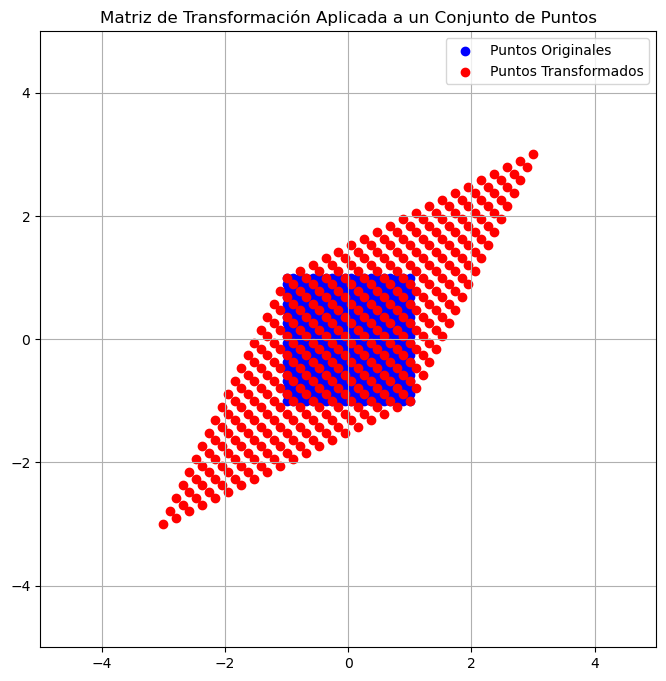

In [33]:
# Definir una matriz de transformación
matrix_transform = np.array([[1, 2],
                             [2, 1]])
# Generar un conjunto de puntos en un cuadrado
x_vals = np.linspace(-1, 1, 20)
y_vals = np.linspace(-1, 1, 20)
xy_grid = np.array([[x, y] for x in x_vals for y in y_vals])
# Aplicar la transformación a la matriz de puntos
transformed_grid = np.dot(matrix_transform, xy_grid.T).T
# Crear la gráfica
fig, ax = plt.subplots(figsize=(8, 8))
# Dibujar los puntos originales
ax.scatter(xy_grid[:, 0], xy_grid[:, 1], color='blue', label='Puntos Originales')
# Dibujar los puntos transformados
ax.scatter(transformed_grid[:, 0], transformed_grid[:, 1], color='red', label='Puntos Transformados')
# Configurar límites y leyenda
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_aspect('equal')
ax.legend()
plt.grid()
plt.title('Matriz de Transformación Aplicada a un Conjunto de Puntos')
plt.show()

En este ejemplo, la matriz de transformación tiene columnas linealmente dependientes (la segunda columna es el doble de la primera), lo que resulta en una reducción de dimensión cuando se aplica a los vectores originales. Puedes observar cómo los vectores transformados quedan en una línea, indicando que han perdido una dimensión.

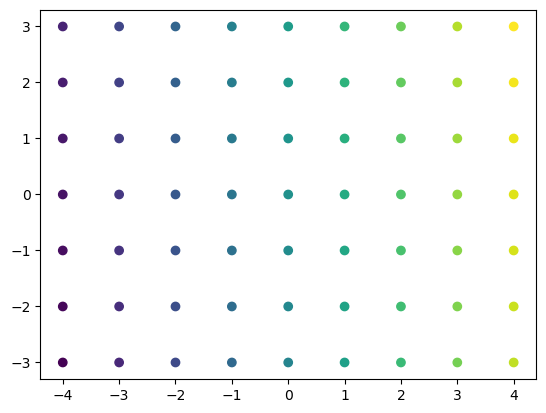

In [37]:
# Supongamos que ya tienes definida xygrid
xvals = np.linspace(-4, 4, 9)
yvals = np.linspace(-3, 3, 7)
xygrid = np.column_stack([[x, y] for x in xvals for y in yvals])
# Definir colores (puedes cambiar esto según tus necesidades)
colors = np.arange(len(xygrid[0, :]))
# Crear la gráfica de dispersión
fig, ax = plt.subplots()
ax.scatter(xygrid[0, :], xygrid[1, :], c=colors, cmap='viridis')  # Usando un mapa de colores para visualizar mejor
plt.show()

Para crear una gráfica animada con una reflexión en la matriz `xygrid`, puedes utilizar la biblioteca `matplotlib` junto con la funcionalidad de animación. Aquí hay un ejemplo utilizando `FuncAnimation` para animar la reflexión de la matriz a lo largo del eje x:

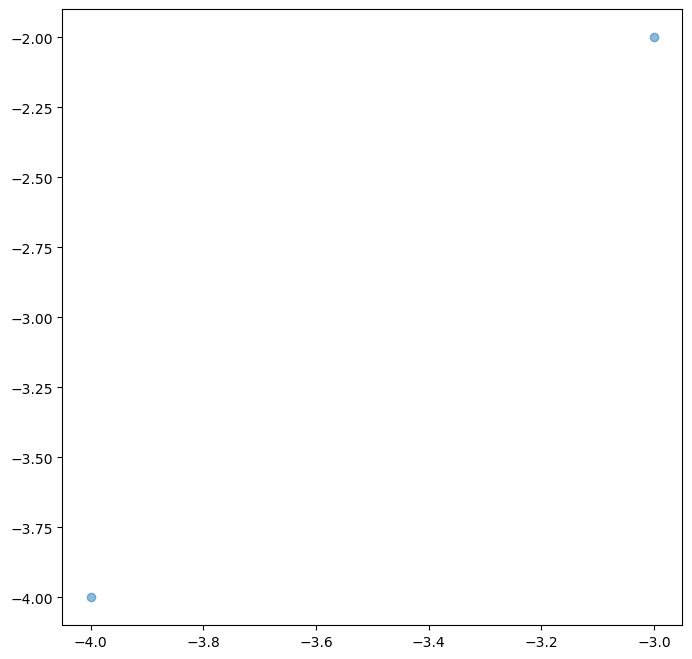

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# Supongamos que ya tienes definida xygrid
xvals = np.linspace(-4, 4, 9)
yvals = np.linspace(-3, 3, 7)
xygrid = np.column_stack([[x, y] for x in xvals for y in yvals])
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 8))
# Crear un objeto de dispersión inicial
scatter = ax.scatter(xygrid[:, 0], xygrid[:, 1], alpha=0.5)
# Función para actualizar la animación
def update(frame):
    # Aplicar reflexión en el eje x a la matriz xygrid
    reflected_grid = np.dot(np.array([[-1, 0], [0, 1]]), xygrid.T).T
    # Actualizar las posiciones de los puntos en el objeto de dispersión
    scatter.set_offsets(reflected_grid)
    # Configurar límites y aspecto
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.set_aspect('equal')
    # Agregar título
    ax.set_title('Animación de Reflexión en el Eje X')
# Crear la animación
animation = FuncAnimation(fig, update, frames=range(180), interval=100)
plt.show()

Este código utiliza una animación para aplicar una reflexión en el eje x a la matriz `xygrid`. Puedes personalizar la animación según tus necesidades.
En este ejemplo, la reflexión se aplica multiplicando la matriz por `[[−1, 0], [0, 1]]`. Puedes ajustar la matriz de reflexión según tus requisitos específicos.

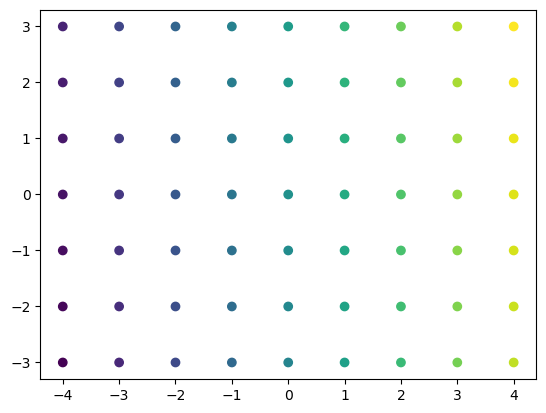

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# Supongamos que ya tienes definida xygrid
xvals = np.linspace(-4, 4, 9)
yvals = np.linspace(-3, 3, 7)
xygrid = np.column_stack([[x, y] for x in xvals for y in yvals])
# Definir colores (puedes cambiar esto según tus necesidades)
colors = np.arange(len(xygrid[0, :]))
# Crear la gráfica de dispersión
fig, ax = plt.subplots()
# Crear un objeto de dispersión inicial
scatter = ax.scatter(xygrid[0, :], xygrid[1, :], c=colors, cmap='viridis')
# Función para actualizar la animación
def update(frame):
    # Aplicar reflexión en el eje x a la matriz xygrid
    reflected_grid = np.dot(np.array([[-1, 0], [0, 1]]), xygrid.T).T
    # Actualizar las posiciones de los puntos en el objeto de dispersión
    scatter.set_offsets(reflected_grid)
    # Configurar límites y aspecto
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.set_aspect('equal')
    # Agregar título
    ax.set_title('Animación de Reflexión en el Eje X')
# Crear la animación
animation = FuncAnimation(fig, update, frames=range(180), interval=100)
plt.show()

Una matriz tridimensional es esencialmente un arreglo con tres dimensiones, generalmente representado como una lista anidada.

In [42]:
# Crear una matriz tridimensional (3x3x3) con valores aleatorios
matriz_tridimensional = np.random.random((3, 3, 3))
# Imprimir la matriz tridimensional
print("Matriz Tridimensional:")
print(matriz_tridimensional)
# Acceder a un elemento específico
elemento = matriz_tridimensional[1, 2, 0]
print("\nElemento en la posición (1, 2, 0):", elemento)
# Sumar todos los elementos de la matriz tridimensional
suma_total = np.sum(matriz_tridimensional)
print("\nSuma total de la matriz tridimensional:", suma_total)

Matriz Tridimensional:
[[[0.7699711  0.3936678  0.84092322]
  [0.99604036 0.73680605 0.81988783]
  [0.30658319 0.78161342 0.47022114]]

 [[0.03405109 0.04252515 0.13939911]
  [0.62576636 0.87847609 0.46678607]
  [0.41568051 0.55444209 0.65505735]]

 [[0.94815695 0.95394588 0.67286389]
  [0.25574571 0.15433878 0.26948502]
  [0.86330344 0.57233432 0.38813152]]]

Elemento en la posición (1, 2, 0): 0.41568051232070924

Suma total de la matriz tridimensional: 15.00620346470349


Este código utiliza NumPy para crear una matriz tridimensional de tamaño (3, 3, 3) con valores aleatorios entre 0 y 1. Luego, muestra cómo acceder a un elemento específico y calcular la suma total de todos los elementos de la matriz tridimensional.
Ten en cuenta que puedes ajustar el tamaño de la matriz tridimensional según tus necesidades. La idea principal es que tienes tres dimensiones, y cada dimensión puede tener diferentes tamaños.

Visualizar una matriz tridimensional puede ser más complejo que visualizar una matriz bidimensional. Una forma común de hacerlo es utilizar gráficos de volumen o "voxels". 

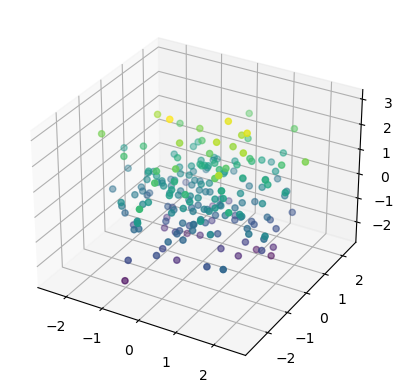

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
np.random.seed(4072023)
x = np.random.normal(size = 200)
y = np.random.normal(size = 200)
z = np.random.normal(size = 200)

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

# 3D scatter plot
ax.scatter(x, y, z, c = z, cmap = 'viridis')

# plt.show()

Este código utiliza `voxels` para visualizar la matriz tridimensional como bloques tridimensionales en un gráfico 3D.

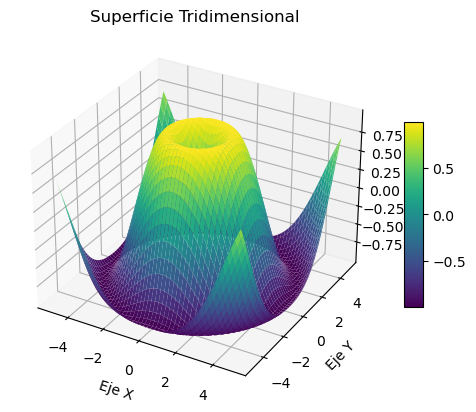

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Crear datos para la superficie tridimensional
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))
# Crear la figura y el eje 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Graficar la superficie tridimensional
surface = ax.plot_surface(x, y, z, cmap='viridis')
# Configurar etiquetas de ejes
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
# Agregar una barra de color
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
# Agregar título
ax.set_title('Superficie Tridimensional')
plt.show()

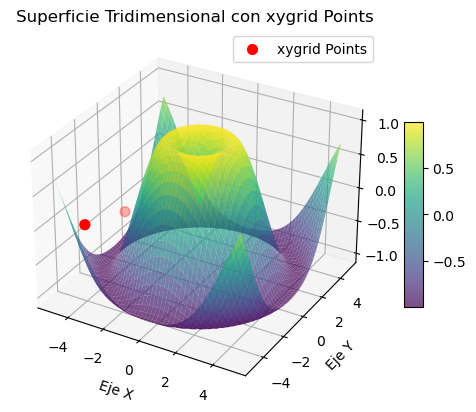

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Crear datos para la superficie tridimensional
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))
# Crear la figura y el eje 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Graficar la superficie tridimensional
surface = ax.plot_surface(x, y, z, cmap='viridis', alpha=0.7)
# Agregar puntos (gráfica de dispersión) desde xygrid
xvals = np.linspace(-4, 4, 9)
yvals = np.linspace(-3, 3, 7)
xygrid = np.column_stack([[x, y] for x in xvals for y in yvals])
ax.scatter(xygrid[:, 0], xygrid[:, 1], np.zeros_like(xygrid[:, 0]), color='r', s=50, label='xygrid Points')
# Configurar etiquetas de ejes
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
# Agregar una barra de color
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
# Agregar título
ax.set_title('Superficie Tridimensional con xygrid Points')
# Mostrar leyenda
ax.legend()
plt.show()

$$
xygrid = 
\begin{bmatrix}
x_1 & x_2 & \cdots & x_n\\
y_1 & y_2 & \cdots & y_n\\
\end{bmatrix}
$$

$$$$

¿Cuál es el resultado de esta multiplicación?

$$$$

$$
\begin{bmatrix}
T_1 & T_3\\
T_2 & T_4\\
\end{bmatrix}
\begin{bmatrix}
x_1 & x_2 & \cdots & x_n\\
y_1 & y_2 & \cdots & y_n\\
\end{bmatrix}
$$

para extraer el primer renglón de una matriz `xygrid`, aquí tienes un código de ejemplo:

In [1]:
%pip install imagemagick

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement imagemagick (from versions: none)
ERROR: No matching distribution found for imagemagick


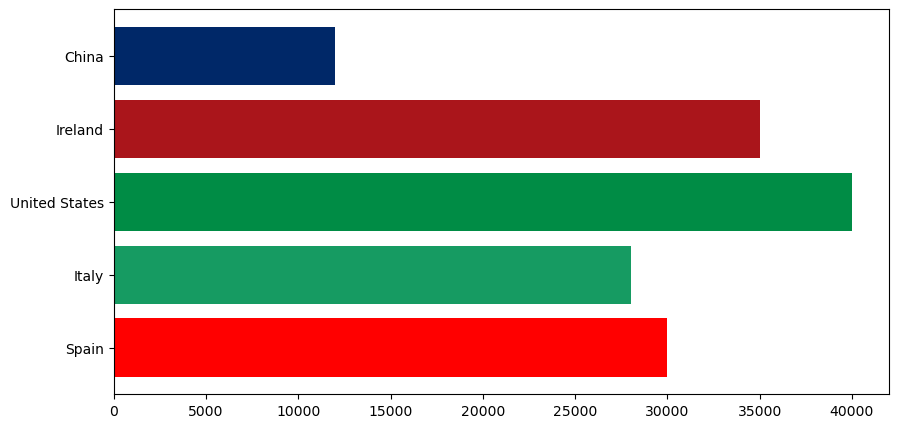

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
# Crear datos ficticios
data = {
    'country': ['Spain', 'Italy', 'United States', 'Ireland', 'China'],
    'year': [2000, 2000, 2000, 2000, 2000],
    'gdpPercap': [30000, 28000, 40000, 35000, 12000]
}
gapminder = pd.DataFrame(data)
font = {
    'weight': 'normal',
    'size': 20,
    'color': 'lightgray'
}
years = gapminder['year'].unique()
colors = ['#FF0000', '#169B62', '#008C45', '#AA151B', '#002868']
fig, ax = plt.subplots(figsize=(10, 5))
label = ax.text(0.95, 0.2, str(years[0]),
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)
def update_barchart(i):
    year = years[i]
    data_temp = gapminder.loc[gapminder['year'] == year, :]
    ax.clear()
    ax.barh(data_temp.country, data_temp.gdpPercap, color=colors)
    label.set_text(str(year))
# Captura la animación en una variable
anim = animation.FuncAnimation(fig, update_barchart, frames=len(years), blit=False)
# Muestra la animación en el entorno de Jupyter
from IPython.display import HTML
HTML(anim.to_jshtml())
# O guarda la animación como un archivo GIF
anim.save('barchart.gif', writer='pillow')
plt.show()

In [32]:
# Supongamos que tienes una matriz xygrid
xvals = np.linspace(-4, 4, 9)
yvals = np.linspace(-3, 3, 7)
xygrid = np.column_stack([[x, y] for x in xvals for y in yvals])
# Extraer el primer renglón
primer_renglon = xygrid[0, :]
# Imprimir el resultado
print("Matriz xygrid:")
print(xygrid)
print("\nPrimer Renglón:")
print(primer_renglon)

Matriz xygrid:
[[-4. -4. -4. -4. -4. -4. -4. -3. -3. -3. -3. -3. -3. -3. -2. -2. -2. -2.
  -2. -2. -2. -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  1.
   1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.
   3.  3.  4.  4.  4.  4.  4.  4.  4.]
 [-3. -2. -1.  0.  1.  2.  3. -3. -2. -1.  0.  1.  2.  3. -3. -2. -1.  0.
   1.  2.  3. -3. -2. -1.  0.  1.  2.  3. -3. -2. -1.  0.  1.  2.  3. -3.
  -2. -1.  0.  1.  2.  3. -3. -2. -1.  0.  1.  2.  3. -3. -2. -1.  0.  1.
   2.  3. -3. -2. -1.  0.  1.  2.  3.]]

Primer Renglón:
[-4. -4. -4. -4. -4. -4. -4. -3. -3. -3. -3. -3. -3. -3. -2. -2. -2. -2.
 -2. -2. -2. -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  1.
  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.
  3.  3.  4.  4.  4.  4.  4.  4.  4.]


Este código crea una matriz `xygrid` utilizando valores generados con NumPy y luego extrae el primer renglón de esa matriz.

Si deseas visualizar gráficamente la matriz `xygrid` y resaltar el primer renglón, puedes hacerlo utilizando una gráfica de dispersión. Cada punto en la gráfica representará un par de coordenadas de la matriz, y el primer renglón se destacará de alguna manera.

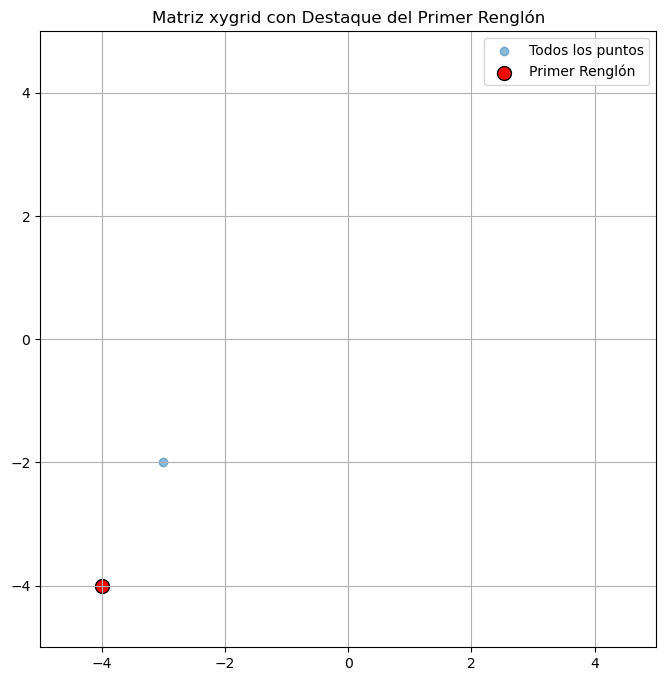

In [38]:
# Supongamos que tienes una matriz xygrid
xvals = np.linspace(-4, 4, 9)
yvals = np.linspace(-3, 3, 7)
xygrid = np.column_stack([[x, y] for x in xvals for y in yvals])
# Extraer el primer renglón
primer_renglon = xygrid[0, :]
# Crear la gráfica de dispersión
fig, ax = plt.subplots(figsize=(8, 8))
# Dibujar todos los puntos en xygrid
ax.scatter(xygrid[:, 0], xygrid[:, 1], label='Todos los puntos', alpha=0.5)
# Destacar el primer renglón
ax.scatter(primer_renglon[0], primer_renglon[1], color='red', label='Primer Renglón', s=100, edgecolors='black')
# Configurar límites y leyenda
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_aspect('equal')
ax.legend()
plt.grid()
plt.title('Matriz xygrid con Destaque del Primer Renglón')
plt.show()

Este código utiliza la función `scatter` de Matplotlib para trazar todos los puntos en `xygrid` y luego resalta el primer renglón en rojo.

La función `map()` en Python es una función incorporada que aplica una función a todos los elementos de un iterable (por ejemplo, una lista) y devuelve un objeto map que contiene los resultados, los guarda en la memoria. La sintaxis general es la siguiente:

`func`: La función que se aplicará a cada elemento del iterable.
`iterable`: El iterable (por ejemplo, una lista) cuyos elementos se pasarán a la función.
El resultado es un objeto `map`, que puede convertirse a una lista u otro tipo de iterable según sea necesario.
Aquí hay un ejemplo simple:

In [34]:
# Definir una función
def cuadrado(x):
    return x**2
# Crear una lista de números
numeros = [1, 2, 3, 4, 5]
# Aplicar la función cuadrado a cada elemento de la lista usando map
resultado = map(cuadrado, numeros)
# Convertir el objeto map a una lista para ver los resultados
lista_resultado = list(resultado)
print(lista_resultado)

[1, 4, 9, 16, 25]


En este ejemplo, la función `cuadrado` se aplica a cada elemento de la lista `numeros` utilizando `map()`, y los resultados se almacenan en la lista `lista_resultado`. En este caso, el resultado sería `[1, 4, 9, 16, 25]`, ya que cada número se eleva al cuadrado.

<h4> Matriz de Rotación</h4>

una matriz de rotación es la matriz que representa una rotación en el espacio euclídeo. Por ejemplo, la matriz

$$
R(\theta)
=
\begin{bmatrix}
\cos{\theta} & - \sin{\theta}\\
\sin{\theta} & \cos{\theta}\\
\end{bmatrix}
$$

$$
R_x(\theta)
=
\begin{bmatrix}
1 & 0 & 0\\
0 & \cos{\theta} & - \sin{\theta}\\
0 & \sin{\theta} & \cos{\theta}\\
\end{bmatrix}
$$

[Regresar al Contenido](#Contenido)

<hr>
<h2>Determinante</h2>

<h3>Interpretación geométrica</h3>

$$$$

El determinante es algo complicado de definir formalmente, por lo que lo entenderemos como una función, que asigna a una [matriz cuadrada](#Glosario) un número real, para entender un poco del significado geométrico que tiene el determinante deberemos observar algunas transformaciones lineales, y ver como algunas parecen estirar el espacio, mientras que otras parecen encogerlo. Luego nos fijaremos en cómo cambian las áreas después de aplicar una transformación lineal, por ejemplo tomemos la transformación:

$$$$

$$
\begin{bmatrix}
3 & 0\\
0 & 2\\
\end{bmatrix}
$$

$$$$

Y nos fijaremos en el cuadrado que tiene por lado a $\hat{i}$ y $\hat{j}$ que tiene un área igual a 1, después de la transformación este se convierte en un rectángulo de área 6, es decir la transformación ha aumentado el área del cuadrado original 6 veces.

<img src="Determinante1.gif" width = 400 height = 400>

En cambio si nos fijamos en la transformación lineal:

$$$$

$$
\begin{bmatrix}
1 & 1\\
0 & 1\\
\end{bmatrix}
$$

$$$$

Vemos que esta convierte el cuadrado de área 1, en un paralelogramo que también tiene área 1.

<img src="Determinante2.gif" width = 400 height = 400>


Hay que tener en cuenta que al saber como se modifica el cuadrado unitario formado por $\hat{i}$ y $\hat{j}$, podemos saber como se modifica cualquier otra área, ya que cualquier área puede ser aproximada por cuadrados que se comporta igual que el unitario.

<img src="Determinate3.gif" width = 400 height = 400>
<img src="Determinante4.gif" width = 400 height = 400>

$$$$

A este factor de cambio que nos muestra como la transformación modifica el espacio _es_ el determinante de la transformación.

<h4>Calculo de Áreas</h4>

Nota que Esta idea nos permite hacer el cálculo de áreas, en particular las áreas de los parelogramos cuyos lados sean dos vectores que nosotros conozcamos.

<img src = https://upload.wikimedia.org/wikipedia/commons/a/a4/Determinant_de_vecteur_dim_2.jpg>

Por ejemplo imagina que en la imagen $\vec{X} = \begin{bmatrix} 2 \\ 3\\ \end{bmatrix}$ y $\vec{X}^\prime = \begin{bmatrix} 3 \\ 2\\ \end{bmatrix}$, entonces el parelogramo que se forma con ellos como lados es el resultado de aplicar al cuadro unitario la siguiente transformación lineal:

$$
\begin{bmatrix} 
2 & 3\\ 
3 & 2\\ 
\end{bmatrix}
$$

Si el determinante de una transformación es 0, es porque esta comprime el espacio en uno de menor dimensión.

Pero el determinante también puede ser un número negativo, y esto nos da información de la orientación en la que trabaja la transformación lineal. por ejemplo, la siguiente transformación parece dar la vuelta al plano:

<img src="Determinante5.gif" width = 400 height = 400>

<h3>Calculo de determinantes</h3>


El cálculo del determinante de una matriz de dimensión 2 o 3 es relativamente sencillo, para el caso de dimensión 2 se tiene:

$$det(A) = \left|
\begin{array}
 aa & b\\
 c & d
 \end{array}
 \right|
 = ad - bc
 $$
 
 Y para el caso de dimensión 3 se tiene:
 
 $$det(A) = \left|
\begin{array}
 aa & b & c\\
 d & e & f\\
 g & h & i\\
 \end{array}
 \right|
 =
 a
 \left|
 \begin{array}
 ae & f\\
 h & i\\
 \end{array}
 \right| 
 - b
 \left|
 \begin{array}
 ad & f\\
 g & i
 \end{array}
 \right| 
 + c
 \left|
 \begin{array}
 ad & e\\
 g & h
 \end{array}
 \right|
 $$

<h3>Ejercicios</h3>


- Calcular el volumen del paralelepípedo definido por los vectores: $\vec{a} = \begin{bmatrix} 5 \\ 3\\ 2\\\end{bmatrix}$, $\vec{b} = \begin{bmatrix} -1 \\ 4\\ 1\\\end{bmatrix}$, $\vec{c} = \begin{bmatrix} 1 \\ 1\\ 6\\\end{bmatrix}$